In this analysis, I am showcasing my abilities in:
* creating and answering business questions
* data cleaning and analysis
* 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [37]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Business questions
1. What does the `Weekly_Sales` look like?
2. Which week, month, and year is the most profitable?
    * Is there any pattern?
    * Do holidays always mean more profitable than normal days?
3. What would be the prediction for the year 2012++?

#  Analysis of Sales Data Set

In [38]:
sales = pd.read_csv("/content/drive/MyDrive/Data Sets/Retails/sales data-set.csv")
print(sales.head())
print(sales.shape)

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False
(421570, 5)


In [39]:
# Finding NaN values
sales.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [40]:
# Finding duplicate values
sales.duplicated().sum()

0

In [41]:
# Dtypes
sales.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [42]:
# Converting Datetime dtype
sales.Date = pd.to_datetime(sales.Date, format='%d/%m/%Y')

# Converting IsHoliday to Yes and No
sales.IsHoliday = sales.IsHoliday.astype(object)
sales.IsHoliday.replace(True, 'Yes', inplace=True)
sales.IsHoliday.replace(False, 'No', inplace=True)

In [43]:
# Basic statistical info
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


**Basic EDA Boxplot**

Text(0.5, 1.0, 'Boxplots of Original Data')

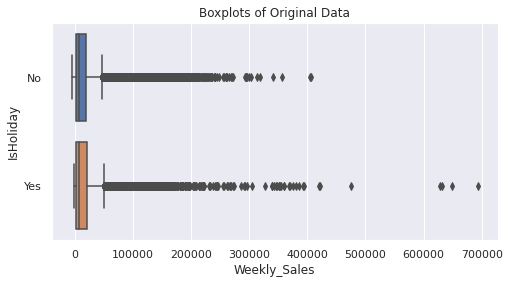

In [44]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Weekly_Sales', data=sales, y='IsHoliday')
plt.title("Boxplots of Original Data")

In [45]:
# Outliers cleaning
Q3 = sales.Weekly_Sales.quantile(q=.75, interpolation='midpoint')
Q1 = sales.Weekly_Sales.quantile(q=.25, interpolation='midpoint')
IQR = Q3 - Q1
lowend = Q1 - (1.5 * IQR)
highend = Q3 + (1.5 * IQR)

# Filtering outliers with query and IQR
sales_filtered = sales.query('@lowend <= @sales.Weekly_Sales <= @highend')

Text(0.5, 1.0, 'Boxplots of Cleaned Data')

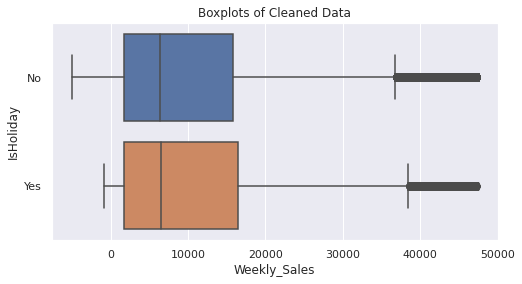

In [46]:
plt.figure(figsize=(8,4))
sns.boxplot(data=sales_filtered, x='Weekly_Sales', y='IsHoliday')
plt.title("Boxplots of Cleaned Data")

Outliers cleaning must be communicated with the stakeholders because the outliers might be their achievements and they do not want to remove it from the analysis. So in this analysis, I will not remove the outliers.

# 1. What does the `Weekly_Sales` look like?

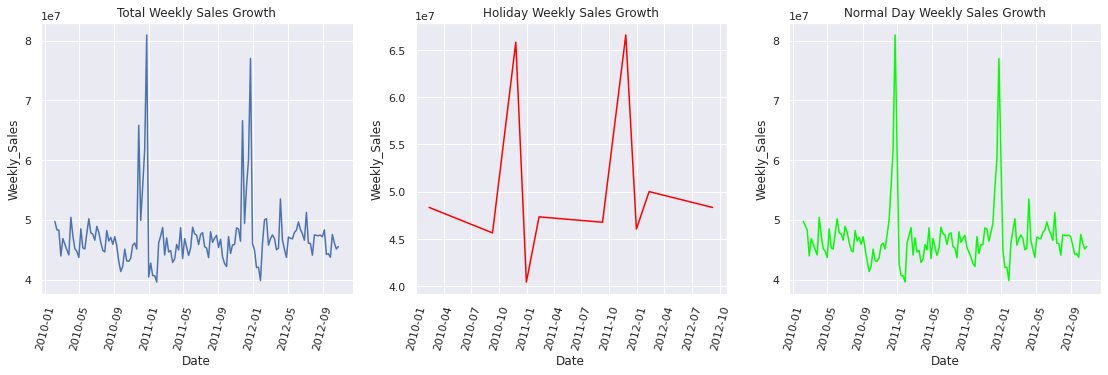

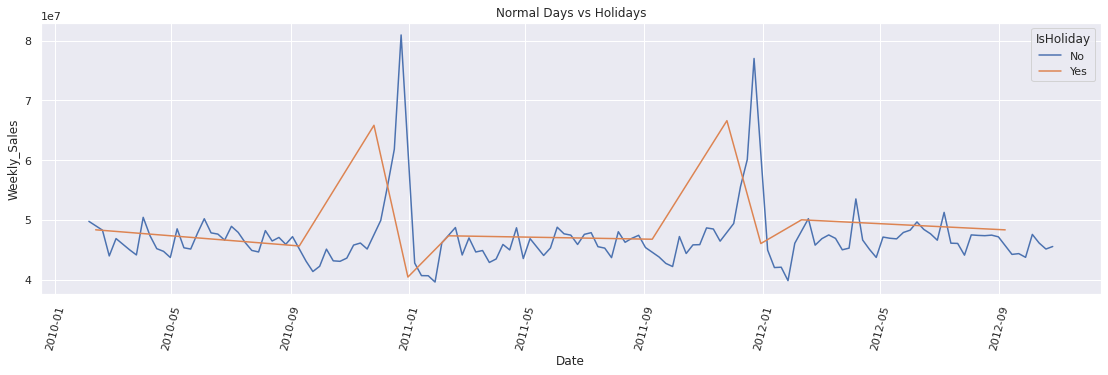

In [47]:
# Multiple plots
fig, axs = plt.subplots(ncols=3, figsize=(19,5))
data = sales.groupby(['Date', 'IsHoliday'], as_index=False).Weekly_Sales.sum()
sns.lineplot(data=data, x='Date', y='Weekly_Sales', ax=axs[0,])
sns.lineplot(data=data.loc[data.IsHoliday == 'Yes'], x='Date', y='Weekly_Sales', ax=axs[1,], color='red')
sns.lineplot(data=data.loc[data.IsHoliday == 'No'], x='Date', y='Weekly_Sales', ax=axs[2,], color='lime')
axs[0].title.set_text('Total Weekly Sales Growth')
axs[1].title.set_text('Holiday Weekly Sales Growth')
axs[2].title.set_text('Normal Day Weekly Sales Growth')

axs[0].tick_params(axis='x', labelrotation=75)
axs[1].tick_params(axis='x', labelrotation=75)
axs[2].tick_params(axis='x', labelrotation=75)
plt.show()

# 2 Plots in the same chart
plt.figure(figsize=(19,5))
plt.title("Normal Days vs Holidays")
sns.lineplot(data=data, x='Date', y='Weekly_Sales', hue='IsHoliday')
plt.xticks(rotation=75)
plt.show()

Why some holidays are lower than normal days?

# 2. Which week, month, and year is the most profitable?

In [48]:
# Creating week
sales['week'] = sales.Date.dt.isocalendar().week

# Creating month
sales['month'] = sales.Date.dt.month

# Creating year
sales['year'] = sales.Date.dt.year

In [49]:
sales[['week', 'month', 'year']].head()

,week,month,year
0,5,2,2010
1,6,2,2010
2,7,2,2010
3,8,2,2010
4,9,3,2010


**The best week**

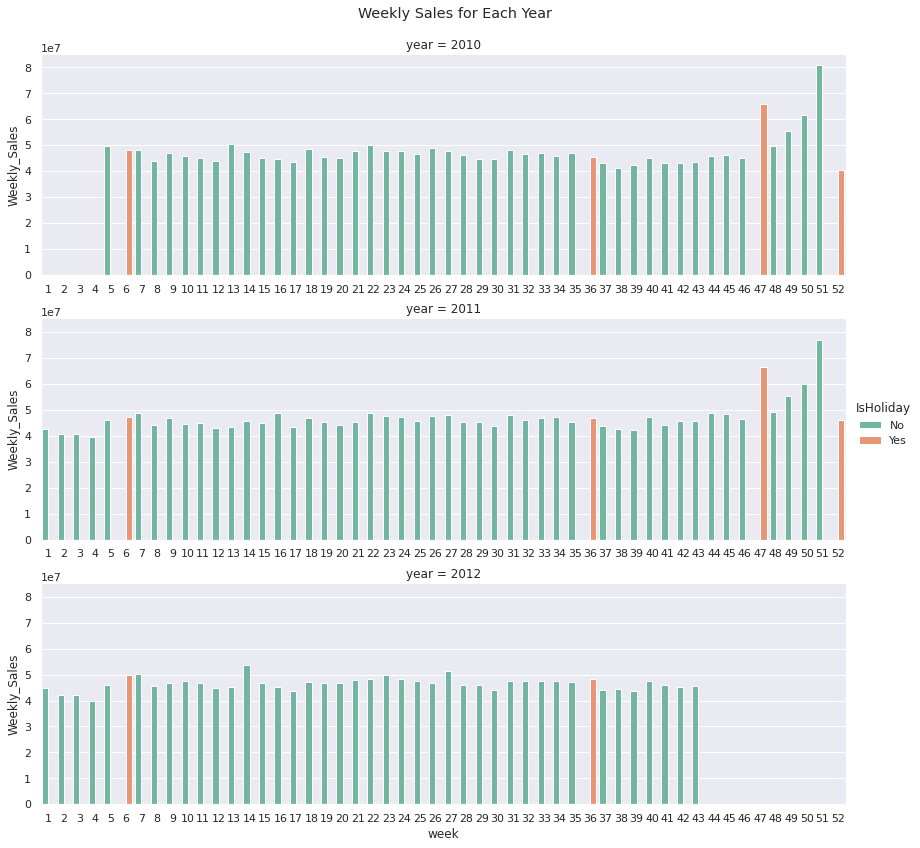

In [50]:
data = sales.groupby(['week', 'IsHoliday', 'year'], as_index=False).Weekly_Sales.sum()
fig = sns.catplot(
    data=data, x='week', y='Weekly_Sales', hue='IsHoliday', row='year',
    kind='bar', height=4, aspect=3, palette='Set2')
fig.fig.subplots_adjust(top=0.925)
plt.subplots_adjust(hspace=0.2, wspace=0.4)
fig.fig.suptitle('Weekly Sales for Each Year')
for axis in fig.axes.flat:
    axis.tick_params(labelbottom=True)

As we can see, holidays occurs in week 6, 36, 47, and 52.

* The highest non holiday sales occured in week 51 in 2010 and 2011 because it was for christmas preparation.

* In 2010, there's no data in week 1 - 4

* In 2012, highest sales occured in week 14 with no data in week 44 onward.

**The best month**

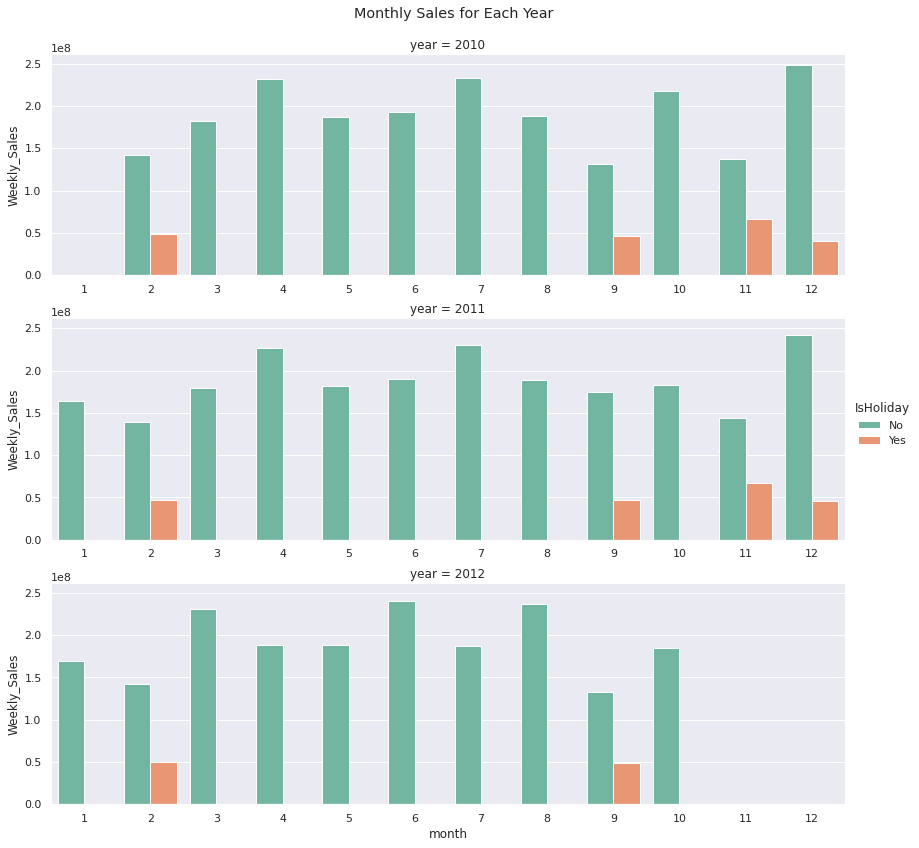

In [51]:
data = sales.groupby(['month', 'IsHoliday', 'year'], as_index=False).Weekly_Sales.sum()
fig = sns.catplot(
    data=data, x='month', y='Weekly_Sales', hue='IsHoliday', row='year',
    kind='bar', height=4, aspect=3, palette='Set2')
fig.fig.subplots_adjust(top=0.925)
plt.subplots_adjust(hspace=0.2, wspace=0.4)
fig.fig.suptitle('Monthly Sales for Each Year')
for axis in fig.axes.flat:
    axis.tick_params(labelbottom=True)

As we can see, there are patterns we can get from the visualisation. 
* Christmas seasons were the most profitable for the retails.
* Preceeding sales before the actual holiday month were always higher.

**The best year**

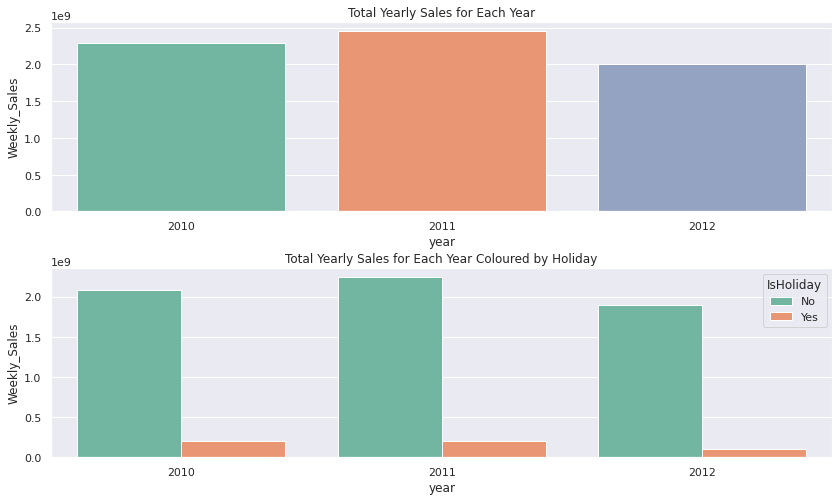

In [52]:
data = sales.groupby(['IsHoliday', 'year'], as_index=False).Weekly_Sales.sum()
fig, axs = plt.subplots(nrows=2, figsize=(14,8))
sns.barplot(data=sales.groupby('year', as_index=False).Weekly_Sales.sum(),
            x='year', y='Weekly_Sales', palette='Set2', ax=axs[0])
sns.barplot(data=data, x='year', y='Weekly_Sales', hue='IsHoliday', palette='Set2', ax=axs[1])

ax=axs[0].title.set_text("Total Yearly Sales for Each Year")
ax=axs[1].title.set_text("Total Yearly Sales for Each Year Coloured by Holiday")
plt.subplots_adjust(hspace=0.3, wspace=0.4)

For yearly sales we can not conclude which year is the best since there are missing values in certain months in 2010 and 2012

# 3. What would be the prediction for the year 2012++?
Before we move on to the more complex method, let's find the relationships with regression plot first.

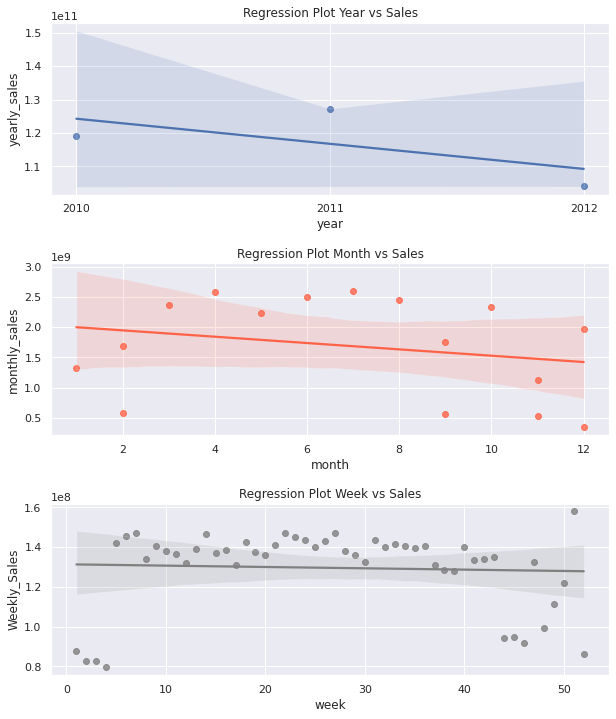

In [77]:
# Creating new features
sales['daily_sales'] = sales.Weekly_Sales / 7
sales['monthly_sales'] = sales.Weekly_Sales * 4
sales['yearly_sales'] = sales.Weekly_Sales * 52

fig, axs = plt.subplots(nrows=3, figsize=(10,12))

data = sales.groupby('year', as_index=False).yearly_sales.sum()
sns.regplot(x='year', y='yearly_sales', data=data, ax=axs[0])

data = sales.groupby(['month', 'IsHoliday'], as_index=False).monthly_sales.sum()
sns.regplot(x='month', y='monthly_sales', data=data, ax=axs[1], color='tomato',)

data = sales.groupby(['week', 'IsHoliday'], as_index=False).Weekly_Sales.sum()
sns.regplot(x='week', y='Weekly_Sales', data=data, ax=axs[2], color='grey',)

axs[0].title.set_text("Regression Plot Year vs Sales")
axs[0].set_xticks([2010,2011,2012])
axs[1].title.set_text("Regression Plot Month vs Sales")
axs[2].title.set_text("Regression Plot Week vs Sales")

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Month vs Sales Coloured by Holiday')

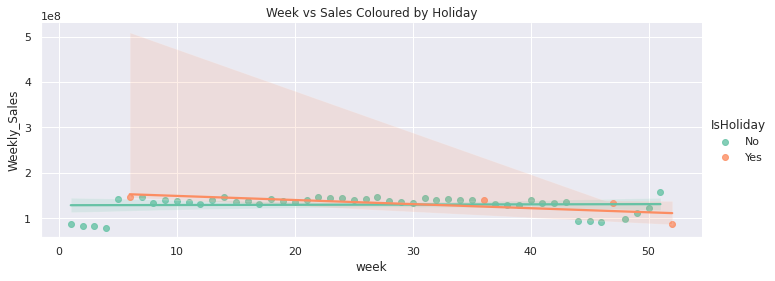

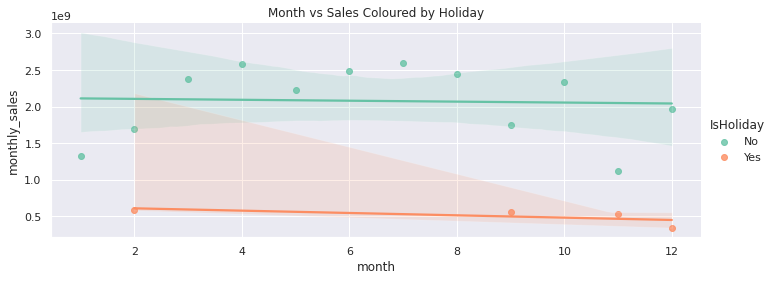

In [78]:
data = sales.groupby(['week', 'IsHoliday'], as_index=False).Weekly_Sales.sum()
sns.lmplot(x="week", 
           y="Weekly_Sales", 
           hue="IsHoliday",
           data=data,
           palette='Set2', height=4, aspect=2.5)
plt.title("Week vs Sales Coloured by Holiday")

data = sales.groupby(['month', 'IsHoliday'], as_index=False).monthly_sales.sum()
sns.lmplot(x="month", 
           y="monthly_sales", 
           hue="IsHoliday",
           data=data,
           palette='Set2', height=4, aspect=2.5)
plt.title("Month vs Sales Coloured by Holiday")

As we can see, there is no strong correlation between time and sales

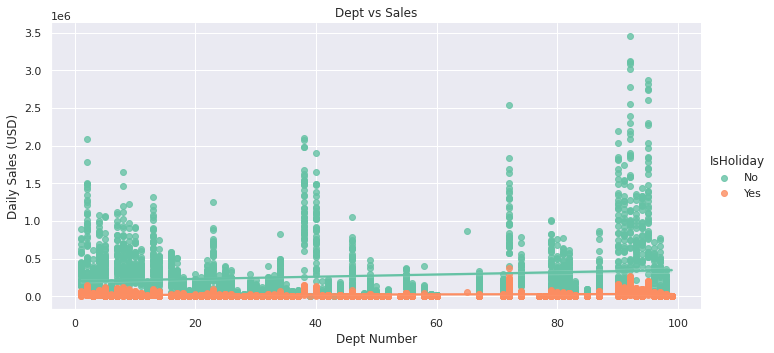

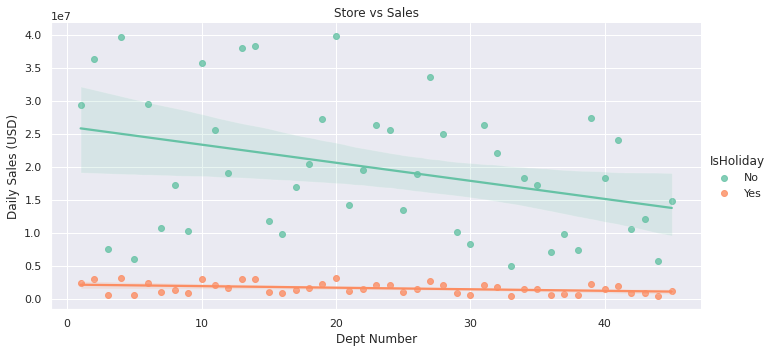

In [66]:
data = sales.groupby(['Dept', 'Store', 'IsHoliday'], as_index=False).daily_sales.sum()
sns.lmplot(x="Dept", 
           y="daily_sales", 
           hue="IsHoliday",
           data=data,
           height=5,
           aspect=2,
           palette='Set2')
plt.title("Dept vs Sales")
plt.ylabel("Daily Sales (USD)")
plt.xlabel("Dept Number")

data = sales.groupby(['Store', 'IsHoliday'], as_index=False).daily_sales.sum()
sns.lmplot(x="Store", 
           y="daily_sales", 
           hue="IsHoliday",
           data=data,
           height=5,
           aspect=2,
           palette='Set2')
plt.title("Store vs Sales")
plt.ylabel("Daily Sales (USD)")
plt.xlabel("Dept Number")
plt.show()

We can not use machine learning models with this data set since there is no strong correlation between features and sales